In [61]:
from dataclasses import dataclass
import numpy as np

@dataclass
class data:
    header: np.int8
    micros: np.uint32
    a_x: np.int16
    a_y: np.int16
    a_z: np.int16
    newline: np.int8

In [62]:
with open("data0.txt", mode='rb') as file: # b is important -> binary
    fileContent = file.read()
    data_np = np.frombuffer(fileContent,np.byte)

In [70]:
data_2d = data_np.reshape((-1, 12))
micros = np.zeros(data_2d.shape[0],dtype=np.uint32)
acceleration = np.zeros((data_2d.shape[0],3),dtype=np.int16)
for i in range(data_2d.shape[0]):
    micros[i] = (data_2d[i,1] << 24) + (data_2d[i,2] << 16) + (data_2d[i,3] << 8) + (data_2d[i,4] << 0)
    acceleration[i] = np.array([(data_2d[i,5] << 8) + (data_2d[i,6] << 0),(data_2d[i,7] << 8) + (data_2d[i,8] << 0),(data_2d[i,9] << 8) + (data_2d[i,10] << 0)],dtype=np.int16)

In [71]:
(data_2d[1,9] << 8) + data_2d[1,10]

15716

In [80]:
(data_2d[33000,1] << 24) + (data_2d[33000,2] << 16) + (data_2d[33000,3] << 8) + (data_2d[33000,4] << 0)

18738254

In [84]:
np.array(data_array)


array([data(header=35, micros=589505315, a_x=8995, a_y=8995, a_z=8995, newline=10),
       data(header=35, micros=8191393, a_x=-176, a_y=-356, a_z=15716, newline=10),
       data(header=35, micros=8191634, a_x=-176, a_y=-356, a_z=15716, newline=10),
       ...,
       data(header=35, micros=18907669, a_x=-208, a_y=72, a_z=15680, newline=10),
       data(header=35, micros=18907910, a_x=-208, a_y=72, a_z=15680, newline=10),
       data(header=35, micros=18907894, a_x=-208, a_y=72, a_z=15680, newline=10)],
      dtype=object)

In [72]:
data_array

[data(header=35, micros=589505315, a_x=8995, a_y=8995, a_z=8995, newline=10),
 data(header=35, micros=8191393, a_x=-176, a_y=-356, a_z=15716, newline=10),
 data(header=35, micros=8191634, a_x=-176, a_y=-356, a_z=15716, newline=10),
 data(header=35, micros=8257411, a_x=-176, a_y=-356, a_z=15716, newline=10),
 data(header=35, micros=8257908, a_x=-152, a_y=0, a_z=15656, newline=10),
 data(header=35, micros=8258148, a_x=-152, a_y=0, a_z=15656, newline=10),
 data(header=35, micros=8258389, a_x=-152, a_y=0, a_z=15656, newline=10),
 data(header=35, micros=8258630, a_x=-152, a_y=0, a_z=15656, newline=10),
 data(header=35, micros=8258871, a_x=-152, a_y=-324, a_z=15244, newline=10),
 data(header=35, micros=8259111, a_x=-152, a_y=-324, a_z=15244, newline=10),
 data(header=35, micros=8259352, a_x=-152, a_y=-324, a_z=15244, newline=10),
 data(header=35, micros=8259593, a_x=-152, a_y=-324, a_z=15244, newline=10),
 data(header=35, micros=8259577, a_x=-240, a_y=-344, a_z=15316, newline=10),
 data(head

In [75]:
delta_micro = np.zeros(len(data_array)-2)
for i in range(1,len(data_array)-2):
    delta_micro[i] = data_array[i+1].micros - data_array[i].micros

In [74]:
delta_micro

array([    0.,   241., 65777., ...,   241.,   240.,   241.])

In [76]:
np.min(delta_micro)

-16725585.0

(array([1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 3.3352e+04,
        1.4500e+02, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([-16725585., -13368727., -10011869.,  -6655011.,  -3298153.,
            58705.,   3415563.,   6772421.,  10129279.,  13486137.,
         16842995.]),
 <BarContainer object of 10 artists>)

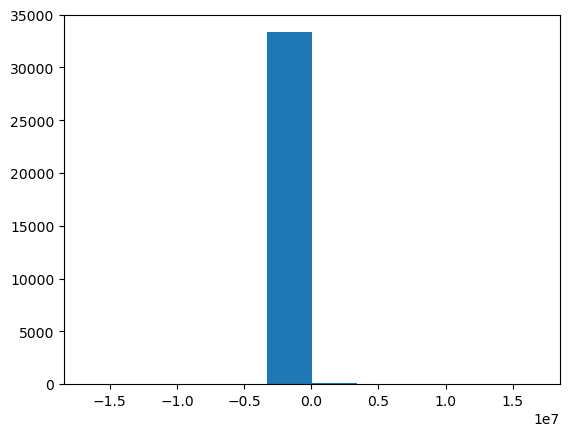

In [69]:
import matplotlib.pyplot as plt

plt.hist(delta_micro)